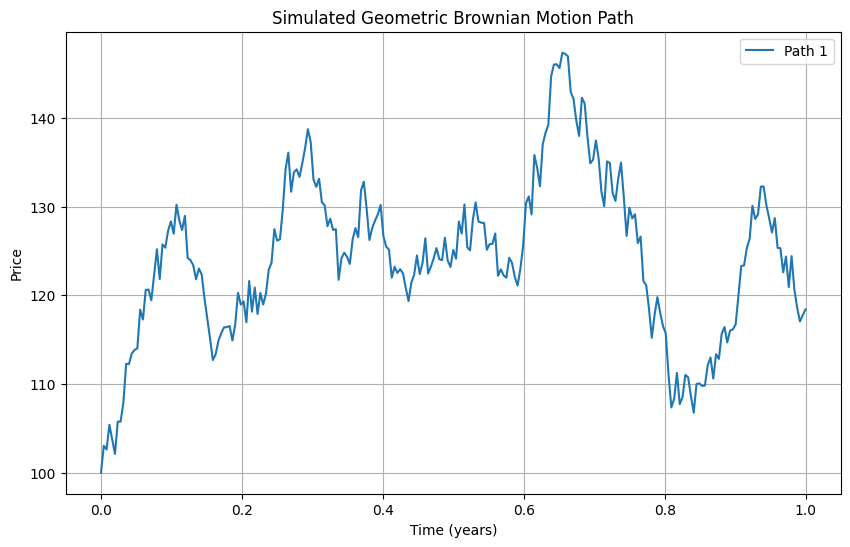

In [1]:
from scripts.plot import plot_gbm_path

# Plot a simulated GBM path
t, S_paths = plot_gbm_path(S0=100, mu=0.07, sigma=0.3, T=1, N=252,  n_paths=1)


[*********************100%***********************]  1 of 1 completed


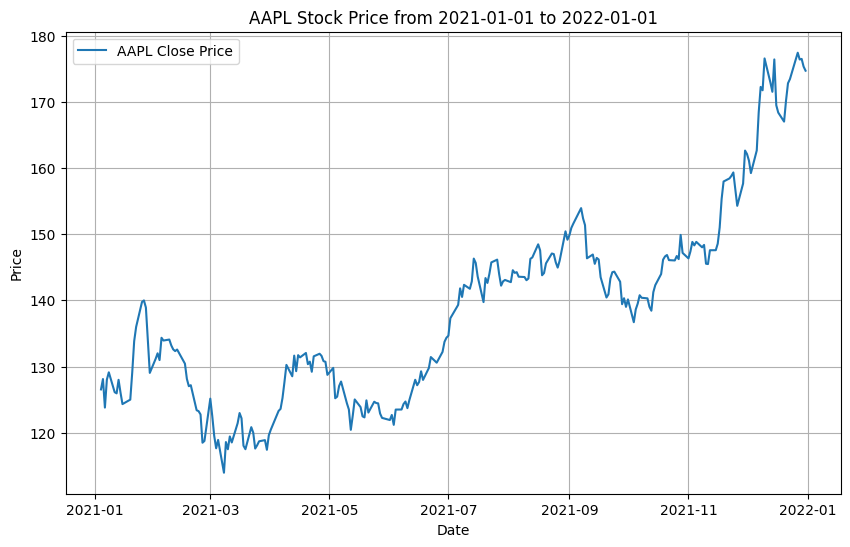

In [2]:
from scripts.plot import plot_stock_path
# Plot a real stock path (e.g., Apple Inc. from 2021-01-01 to 2022-01-01)
data = plot_stock_path('AAPL', '2021-01-01', '2022-01-01')

[*********************100%***********************]  1 of 1 completed


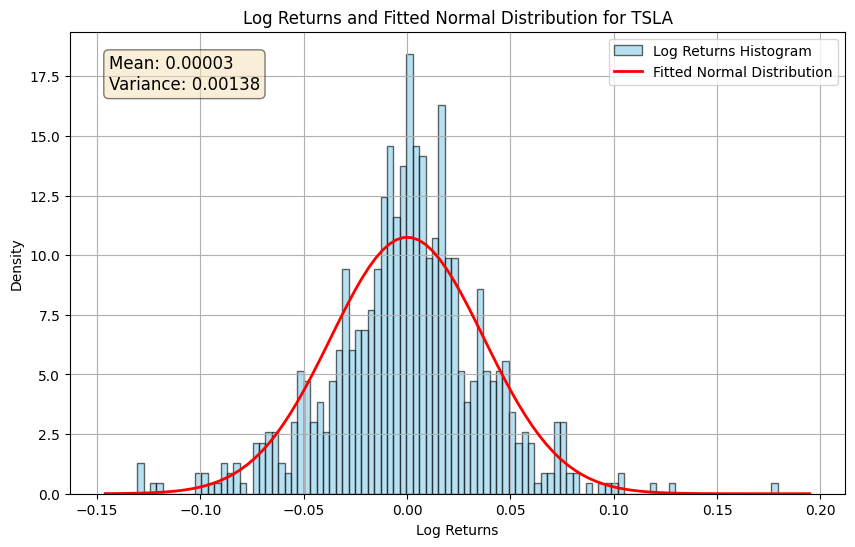

Price,Close,High,Low,Open,Volume,Log_Returns
Ticker,TSLA,TSLA,TSLA,TSLA,TSLA,
Date,,,,,,
2021-01-05,245.036667,246.946671,239.733337,241.220001,96735600,0.007291
2021-01-06,251.993332,258.000000,249.699997,252.830002,134100000,0.027995
2021-01-07,272.013336,272.329987,258.399994,259.209991,154496700,0.076448
2021-01-08,293.339996,294.829987,279.463318,285.333344,225166500,0.075481
2021-01-11,270.396667,284.809998,267.873322,283.133331,177904800,-0.081442
...,...,...,...,...,...,...
2023-12-22,252.539993,258.220001,251.369995,256.760010,93249800,-0.007731
2023-12-26,256.609985,257.970001,252.910004,254.490005,86892400,0.015988


In [3]:

from scripts.plot import plot_log_returns_bell_curve

# Use the function to plot log returns and the fitted normal distribution for a given ticker and date range.
plot_log_returns_bell_curve('TSLA', '2021-01-01', '2024-01-01', bins=100)

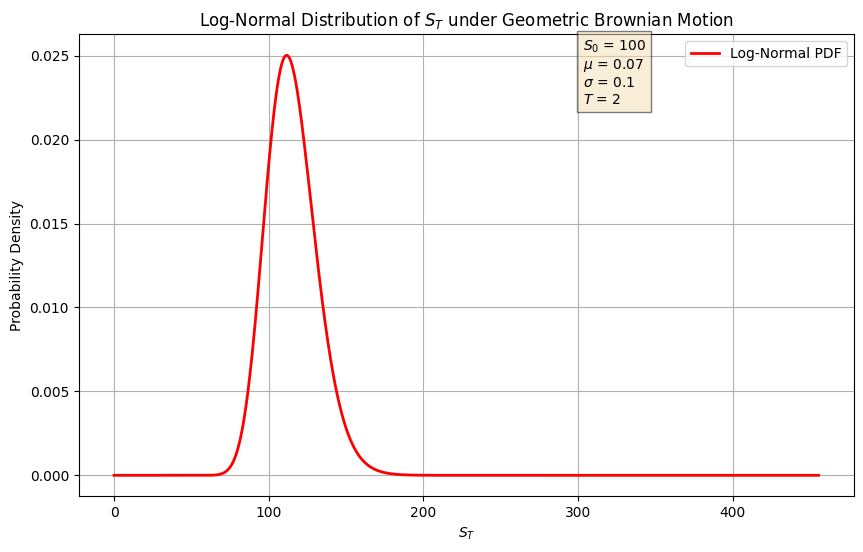

In [8]:
from scripts.plot import plot_log_normal_distribution
mu = 0.07       # annual drift
S0 = 100        # initial stock price
sigma = 0.1    # annual volatility
T = 2          # 1 year
plot_log_normal_distribution(mu, S0, sigma, T)

The Black-Scholes formula provides a theoretical estimate for the price of European-style options, using the assumption of a lognormally distributed underlying asset and continuous trading.

### Black-Scholes Formula for a European Call and Put Option

The price of a European call option $C$ is given by:

$$ c(t) = S(t) \cdot \Phi(d_1) - e^{-r(T-t)} E\cdot \Phi(d_2) $$



where:

- $S(t)$: Stock price at time $t$
- $E$: Strike price of the option
- $T$: Time to expiration
- $r$: Risk-free interest rate
- $\Phi(x)$: Cumulative distribution function of the standard normal distribution
- $d_1$ and $d_2$ are calculated as:

$$ d_1 = \frac{\ln(S(t) / E) + (r + \sigma^2 / 2)(T-t)}{\sigma \sqrt{T-t}} $$
$$ d_2 = d_1 - \sigma \sqrt{T-t} $$

- $\sigma$: Volatility (Standard Deviation) of the stock's returns


In [ ]:
#Example
from scripts.finance import black_scholes_call_price
S0 = 100      # Current stock price
K = 100       # Strike price
r = 0.05      # 5% annual risk-free rate
T = 1         # 1 year until expiration
sigma = 0.2   # 20% annual volatility

price = black_scholes_call_price(S0, K, r, T, sigma)
print(f"The European call option price is: {price:.2f}")

The European call option price is: 10.45


Volatility is a statistical measure of the dispersion of returns for a given security or market index. To estimate the historical volatility of a stock, we can use the daily stock prices over a certain period.

### Estimating Realized Volatility

Given historical stock prices $S(n)$ for $N+1$ days, we can estimate daily returns $R_n$ as:

$$ R_n = \frac{S(n) - S(n - 1)}{S(n - 1)} $$

Then, we compute the daily mean return $\hat{\mu}_d$ and daily volatility $\hat{\sigma}_d$:

$$ \hat{\mu}_d = \frac{1}{N} \sum_{n=1}^{N} \ln(1 + R_n) $$
$$ \hat{\sigma}_d = \sqrt{\frac{1}{N - 1} \sum_{n=1}^{N} (\ln(1 + R_n) - \hat{\mu}_d)^2} $$

To annualize these estimates, assuming 252 trading days in a year, the formulas are:

$$ \hat{\mu} = 252 \hat{\mu}_d $$
$$ \hat{\sigma} = \hat{\sigma}_d \sqrt{252} $$

These estimates provide insights into the average return and the risk or uncertainty of the stock's return, which are pivotal for financial modeling and risk management.

In [ ]:
from finance import black_scholes_put_price

daily_returns = [0.01, -0.005, 0.003, 0.02, -0.01, 0.005, -0.002]

ann_vol, daily_vol, daily_mu = estimate_annualized_volatility(daily_returns)

print(f"Daily Mean Log Return (μ_d): {daily_mu:.5f}")
print(f"Daily Volatility (σ_d): {daily_vol:.5f}")
print(f"Annualized Volatility (σ): {ann_vol:.2%}")